In [5]:
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import glob
import pickle
from dcwetk.cwe_distance import *
from graph_binyanim import *
from sklearn.decomposition import PCA

In [21]:
testToks = ['גידל', 'מגדל', 'גדול']

In [22]:
lemmas = []
for name in tqdm(glob.glob('byp_docs_with_relational_embeddings/*.pickle')):
    if int(name[-11:-7]) in range(1910, 1920):
        print(name[-11:-7])
        with open(name, 'rb') as f:
            docs = pickle.load(f)
            f.close()

        for doc in tqdm(docs):
            for sent in doc:
                for tok in sent:
                    for lem in tok:
                        if lem.lemma in testToks:
                            lemmas.append(lem)

  0%|          | 0/112 [00:00<?, ?it/s]

1910


  0%|          | 0/78 [00:00<?, ?it/s]

1911


  0%|          | 0/85 [00:00<?, ?it/s]

1912


  0%|          | 0/65 [00:00<?, ?it/s]

1913


  0%|          | 0/60 [00:00<?, ?it/s]

1914


  0%|          | 0/64 [00:00<?, ?it/s]

1915


  0%|          | 0/18 [00:00<?, ?it/s]

1916


  0%|          | 0/19 [00:00<?, ?it/s]

1917


  0%|          | 0/44 [00:00<?, ?it/s]

1918


  0%|          | 0/24 [00:00<?, ?it/s]

1919


  0%|          | 0/61 [00:00<?, ?it/s]

{'גידל', 'מגדל', 'גדול'}


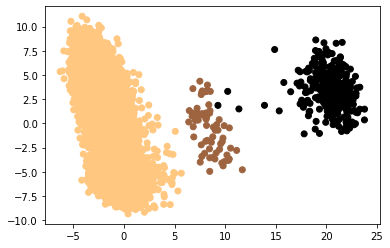

In [28]:
x, y = zip(*PCA(n_components=2).fit_transform(np.array([lem.embedding for lem in lemmas])))

lemma_labs = [lem.lemma for lem in lemmas]
print(set(lemma_labs))
change_rules = {}
index = 0
for lab in set(lemma_labs):
    change_rules[lab] = index
    index += 1

df = pd.DataFrame({'token': [change_rules[i] for i in lemma_labs], 'x': x, 'y': y, 'z': z})

df.dropna()

# instantiate plt figure
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(df['x'], df['y'], c=df['token'], cmap='copper')

plt.show()